In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
dp=pd.read_csv('C:\\Users\\hp\\Desktop\\FODS_2\\FODS-A2.csv')

In [3]:
def calc_weights(X,y):
    
    X=(X-X.mean())/X.std()
    y=(y-y.mean())/y.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90,shuffle=True)
    
    weights=np.ones((X_train.shape[1],1))
    prod=np.dot(X_train.transpose(),X_train)
    inv_mat=np.linalg.inv(prod)
    prod_1=np.dot(inv_mat,X_train.transpose())
    weights=np.dot(prod_1,y_train)
    
    return weights

In [4]:
def model_train_error(X,y,weights):
    X=(X-X.mean())/X.std()
    y=(y-y.mean())/y.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90,shuffle=True)
    
    n=len(X_train)
    err=(1/(2*n))*np.sum(np.square(y_train-np.dot(X_train,weights)))
    return err

In [5]:
def model_test_error(X,y,weights):
    X=(X-X.mean())/X.std()
    y=(y-y.mean())/y.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90,shuffle=True)
    
    n=len(X_test)
    err=(1/(2*n))*np.sum(np.square(y_test-np.dot(X_test,weights)))
    return err

In [6]:
pca_output=[]

In [7]:
cov_mat=np.cov(dp.T)
cov_mat

array([[ 2.62489898e+00,  1.15784352e+00,  3.00374602e+00,
         7.78540737e-02,  2.93523435e+00, -6.34814836e-02,
         2.91997488e+00,  8.25043951e-01,  2.69001821e+00,
        -1.58088697e-01,  6.53045173e+00, -3.07962541e+01,
         2.90040849e+00,  1.29040659e+00,  2.63280592e+00,
         1.01259217e-01,  2.78395960e+00,  5.75639677e-01,
         5.97296058e+00, -1.81913834e+00, -8.16687014e+00,
        -3.40448387e-01, -1.35424972e+00,  3.99762102e+00,
        -2.81594696e-01, -2.81594696e-01,  8.05888303e+00],
       [ 1.15784352e+00,  1.59517600e+01,  2.44929609e+00,
         1.30694800e+01,  2.13492488e+00,  1.10937501e+01,
         9.68942595e-01,  1.54566513e+01,  1.58739322e+00,
         1.08132165e+01,  7.84927787e+00,  3.04787925e+01,
         2.46653590e-01,  1.66128540e+01, -1.86503475e-01,
         1.55982629e+01,  1.00860126e+00,  1.28075355e+01,
         7.44176106e+00, -8.27822881e+00,  1.66329347e+01,
         1.89706178e+00, -1.02685594e+00,  1.09595387e+

In [8]:
eigen_values,eigen_vectors=np.linalg.eig(cov_mat)
eigen_values

array([1.09012571e+04, 1.15942310e+03, 4.11859171e+02, 1.57067489e+02,
       1.34908524e+02, 9.86468623e+01, 6.70741755e+01, 4.76427708e+01,
       1.14428017e+01, 7.71199274e+00, 7.33763089e+00, 4.00178501e+00,
       3.29964990e+00, 2.68158974e+00, 2.54224438e+00, 1.30165824e+00,
       9.15675606e-01, 7.14952322e-01, 6.27670942e-01, 4.75979884e-01,
       4.05541592e-01, 2.93564959e-01, 2.10064168e-01, 1.33756416e-01,
       7.16457000e-02, 9.77895859e-02, 1.09437612e-17])

In [9]:
eigen_vectors

array([[-8.46040015e-04, -2.80442471e-02, -1.00683557e-03,
         5.76812646e-02, -2.82400816e-02,  1.15548496e-02,
        -4.42462495e-03, -1.66980246e-03, -1.18229023e-01,
         2.19203563e-01,  1.66447279e-01, -1.39532151e-01,
         1.18134237e-01,  6.54556003e-02,  1.30170959e-02,
        -1.42216781e-01, -7.48130761e-02,  4.29343143e-02,
         1.72763437e-01, -1.66005427e-01, -3.39805768e-01,
        -1.81842482e-01, -3.66383142e-01, -2.88869846e-01,
        -6.44267650e-01,  3.08327825e-02, -2.27683654e-19],
       [-2.81870202e-03,  3.30644074e-02,  2.34978263e-03,
         2.44790466e-01, -9.43230622e-02, -5.27872847e-02,
        -8.65553529e-02,  6.03854226e-02,  2.48568177e-01,
         2.68587846e-01, -3.08083399e-01,  1.86538361e-01,
         3.07721212e-01,  1.19495365e-01,  2.08715297e-01,
         4.85971411e-01,  2.12919927e-01, -3.84603756e-01,
        -3.77868108e-02, -1.28405078e-01,  7.38181348e-02,
        -2.87795190e-02,  9.90070558e-02, -1.27573866e-

In [10]:
indices=np.argsort(-eigen_values).tolist()
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 24,
 26]

In [11]:
for i in range(0,26):
    X=dp[dp.columns[indices[0:i]]]
    y=dp['Appliances']
    weights=calc_weights(X,y)
    train_error=model_train_error(X,y,weights)
    test_error=model_test_error(X,y,weights)
    print("Final weights for ",i+1," set of features are:" ,weights)
    print("The Training error for ",i+1, " set of features is:", train_error)
    print("The Testing error for ",i+1," set of features is:", test_error)
    sum_of_all_eigen_values=np.sum(eigen_values)
    sum_of_selected_eigen_values=0.00
    for x in range(0,i+1):
        sum_of_selected_eigen_values+=eigen_values[[indices[x]]]
    print("Percentage of variance explained: ",(sum_of_selected_eigen_values*100/sum_of_all_eigen_values)[0],'%')
    print("\n")
    pca_output.append((i+1,train_error,test_error,(sum_of_selected_eigen_values*100/sum_of_all_eigen_values)[0]))

Final weights for  1  set of features are: []
The Training error for  1  set of features is: 0.5162275031774761
The Testing error for  1  set of features is: 0.4347836082546695
Percentage of variance explained:  83.71322033694922 %


Final weights for  2  set of features are: [0.04599612]
The Training error for  2  set of features is: 0.5151682643363538
The Testing error for  2  set of features is: 0.4333463081377329
Percentage of variance explained:  92.61669276743643 %


Final weights for  3  set of features are: [0.03390471 0.06883332]
The Training error for  3  set of features is: 0.5128819900818733
The Testing error for  3  set of features is: 0.4304623861394657
Percentage of variance explained:  95.77945255489901 %


Final weights for  4  set of features are: [-0.13742779  0.04236876  0.21145074]
The Training error for  4  set of features is: 0.5065186680279316
The Testing error for  4  set of features is: 0.42360737742642346
Percentage of variance explained:  96.98560935163188 %

In [12]:
pca_output=pd.DataFrame(pca_output)
pca_output

,0,1,2,3
0,1,0.516228,0.434784,83.713220
1,2,0.515168,0.433346,92.616693
2,3,0.512882,0.430462,95.779453
3,4,0.506519,0.423607,96.985609
4,5,0.483296,0.390786,98.021602
5,6,0.475176,0.381228,98.779134
6,7,0.474912,0.382047,99.294212
7,8,0.473794,0.381751,99.660071
8,9,0.473511,0.381018,99.747943
9,10,0.471621,0.380998,99.807165


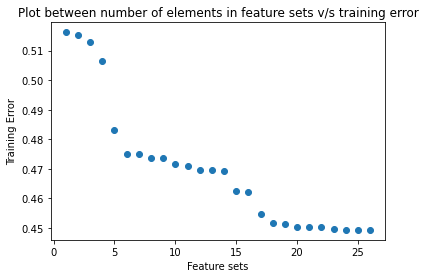

In [13]:
plt.scatter(pca_output[0],pca_output[1])
plt.xlabel("Feature sets")
plt.ylabel("Training Error")
plt.title("Plot between number of elements in feature sets v/s training error")
plt.show()

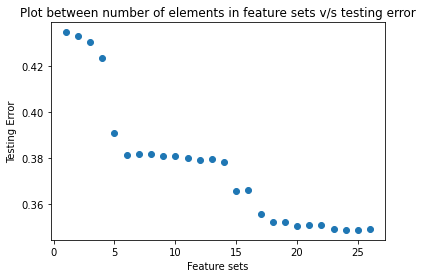

In [14]:
plt.scatter(pca_output[0],pca_output[2])
plt.xlabel("Feature sets")
plt.ylabel("Testing Error")
plt.title("Plot between number of elements in feature sets v/s testing error")
plt.show()

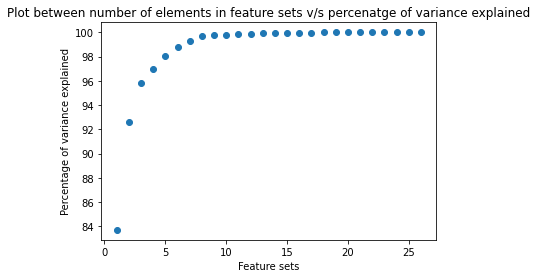

In [15]:
plt.scatter(pca_output[0],pca_output[3])
plt.xlabel("Feature sets")
plt.ylabel("Percentage of variance explained")
plt.title("Plot between number of elements in feature sets v/s percenatge of variance explained")
plt.show()